# AGE-MOEA

AgeMoea is an adaptive evolutionary algorithm based on non-Euclidean geometry for many-objective optimization. Its main strength lies in discovering the geometry of the first (Pareto) front, enabling the algorithm to capture the intrinsic structure of the solution space and thereby improve both convergence and diversity.

## Key Features

- **Adaptive Geometry-based Search:**  
  AgeMoea leverages non-Euclidean geometric principles to model the shape and curvature of the first front. This approach allows the algorithm to dynamically adjust its search strategy based on the topology and geometric structure of the optimal solutions.

- **Focus on Pareto Front Geometry:**  
  By emphasizing the geometry of the Pareto front, the algorithm can identify promising regions and ensure a balanced distribution of solutions along the front. This strategy favors the exploration of areas of interest while maintaining diversity.

- **Dynamic Evolutionary Process:**  
  Throughout its evolution, AgeMoea adapts its search parameters based on the geometric information extracted from the current solution set. This adaptive mechanism allows for more efficient navigation in complex search spaces, overcoming the limitations of traditional Euclidean metrics.

## Algorithm Complexity

As stated in the referenced paper, the computational complexity of this 2 is:
$$
O(M \times N^2) + O(N^3)
$$
where $M$ is the number of objectives and $N$ is the population size. This complexity indicates that the algorithm may not be very efficient for large population sizes, since the $O(N^3)$ term can become computationally prohibitive as $N$ increases.

## How the Algorithm Works

- **Non-Euclidean Metrics:**  
  Instead of relying solely on Euclidean distance, AgeMoea employs metrics that capture the true curvature and topology of the Pareto front. This distinction allows the algorithm to differentiate between solutions that are geometrically close in a traditional sense but are significantly different along the front.

- **Geometry-based Selection:**  
  The selection phase prioritizes solutions that best represent the geometric structure of the Pareto front. This ensures a balanced representation of diversity and an accurate depiction of the optimal front's shape.

- **Adaptive Parameter Tuning:**  
  As the algorithm iterates, it dynamically adjusts its parameters based on the detected geometric characteristics, enabling more effective exploration and exploitation of the solution space.

## Conclusion

AgeMoea introduces an innovative approach to many-objective optimization by incorporating non-Euclidean geometric concepts to uncover and exploit the structure of the Pareto front. While its performance on benchmarks like ZTD1 demonstrates its ability to balance convergence and diversity, the computational complexity of $$O(M \times N^2) + O(N^3)$$ can be a limiting factor when handling very large populations.

## ZTD1 Problem

This problem was explained in the RNSGA-II section


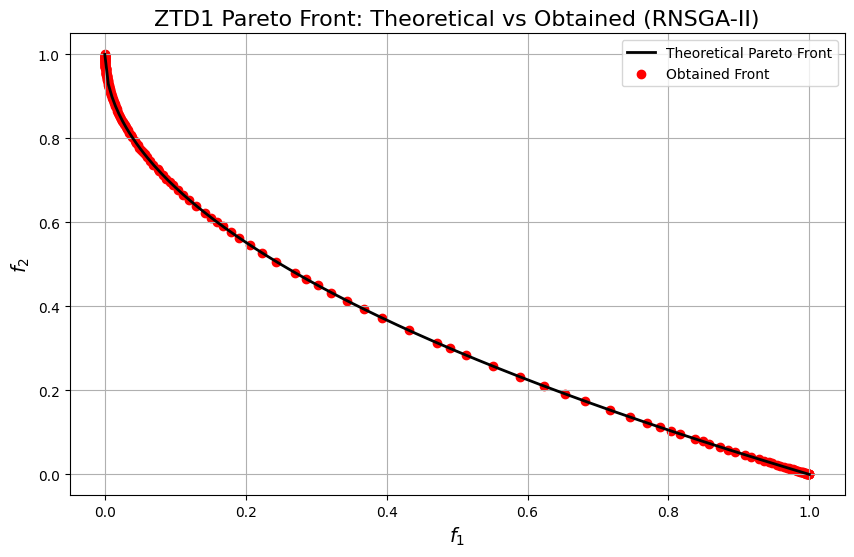

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from pymoors import (
    AgeMoea,
    RandomSamplingFloat,
    GaussianMutation,
    SimulatedBinaryCrossover,
    CloseDuplicatesCleaner
)
from pymoors.schemas import Population
from pymoors.typing import TwoDArray

np.seterr(invalid='ignore')

def evaluate_ztd1(x: TwoDArray) -> TwoDArray:
    """
    Evaluate the ZTD1 objectives in a fully vectorized manner.
    """
    f1 = x[:, 0]
    g = 1 + 9.0 / (30 - 1) * np.sum(x[:, 1:], axis=1)
    f2 = g * (1 - np.power((f1 / g), 0.5))
    return np.column_stack((f1, f2))

def ztd1_theoretical_front():
    """
    Compute the theoretical Pareto front for ZTD1.
    """
    f1_theo = np.linspace(0, 1, 200)
    f2_theo = 1 - np.sqrt(f1_theo)
    return f1_theo, f2_theo


# Set up AgeMoea algorithm
algorithm = AgeMoea(
    sampler=RandomSamplingFloat(min=0, max=1),
    crossover=SimulatedBinaryCrossover(distribution_index=10),
    mutation=GaussianMutation(gene_mutation_rate=0.1, sigma=0.01),
    fitness_fn=evaluate_ztd1,
    duplicates_cleaner=CloseDuplicatesCleaner(epsilon=1e-8),
    n_vars=30,
    population_size=200,
    n_offsprings=200,
    n_iterations=300,
    mutation_rate=0.1,
    crossover_rate=0.9,
    keep_infeasible=False,
    upper_bound=1,
    lower_bound=0,
    verbose=False,
    seed = 1729
)

# Run the algorithm
algorithm.run()

# Get the best Pareto front obtained (as a Population instance)
best: Population = algorithm.population.best_as_population
obtained_fitness = best.fitness

# Compute the theoretical Pareto front for ZTD1
f1_theo, f2_theo = ztd1_theoretical_front()

# Plot the theoretical Pareto front, obtained front, and reference points
plt.figure(figsize=(10, 6))
plt.plot(f1_theo, f2_theo, 'k-', linewidth=2, label='Theoretical Pareto Front')
plt.scatter(obtained_fitness[:, 0], obtained_fitness[:, 1], c='r', marker='o', label='Obtained Front')
plt.xlabel('$f_1$', fontsize=14)
plt.ylabel('$f_2$', fontsize=14)
plt.title('ZTD1 Pareto Front: Theoretical vs Obtained (RNSGA-II)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
